# ASSIGNMENT 3 Group 16

### Group Members
- **Akash Krishnan Ravi: 2450670**
- **Anitha Kanagaraj: 24232434**
- **Yixing Lei:23100627**

#### Contribution
- **Data Exploration, Preprocessing, and Classification**  
  Akash Krishnan Ravi, Anitha Kanagaraj
- **Clustering**  
  Yixing Lei


In [1]:
!pip install lightgbm
!pip install xgboost
!pip install catboost
!pip install "dask[dataframe]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 7.9 MB/s eta 0:00:00


## **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, classification_report, confusion_matrix, make_scorer, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import IsolationForest, RandomForestClassifier, StackingClassifier
from imblearn.over_sampling import ADASYN
from collections import Counter
import time
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb


# **Data Preprocessing**

In [ ]:
# Load and prepare data
train_data = pd.read_csv(r'/content/train-3.csv')
test_data = pd.read_csv(r'/content/test-4.csv')
print(train_data.shape)  # Shows number of rows and columns
print(train_data.head()) # Shows first few rows
print(test_data.shape)  # Shows number of rows and columns
print(test_data.head()) # Shows first few rows

(40007, 21)
   COUGH  MUSCLE_ACHES  TIREDNESS  SORE_THROAT  RUNNY_NOSE  STUFFY_NOSE  \
0      1             0          1            1           0            1   
1      1             1          0            0           1            0   
2      1             1          0            0           1            1   
3      1             1          0            0           1            0   
4      1             0          1            1           1            1   

   FEVER  NAUSEA  VOMITING  DIARRHEA  ...  DIFFICULTY_BREATHING  \
0      0       0         0         0  ...                     0   
1      0       0         1         1  ...                     1   
2      0       0         0         0  ...                     0   
3      1       0         0         0  ...                     0   
4      1       1         1         0  ...                     1   

   LOSS_OF_TASTE  LOSS_OF_SMELL  ITCHY_NOSE  ITCHY_EYES  ITCHY_MOUTH  \
0              1              1           1           1       

**Printing columns in the dataset**

In [ ]:
#Printing Columns of the dataset

print(train_data.columns)
print(test_data.columns)

print("--------------------------------------------------")

# Display basic information about the datasets
print("Training Dataset Info:")
print(train_data.info())
print("\nTest Dataset Info:")
print(test_data.info())

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE'],
      dtype='object')
Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE'],
      dtype='object')
--------------------------------------------------
Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40007 entries, 0 to 40006
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 

**Check Duplicates in Test and Train Data**

In [ ]:
# Check duplicates in training data
print("Training data duplicates:", train_data.duplicated().sum())

# Check duplicates in test data
print("Test data duplicates:", test_data.duplicated().sum())


Training data duplicates: 0
Test data duplicates: 0


In [ ]:
# Check missing values in training data
print("Missing values in training data:")
print(train_data.isnull().sum())

# Check missing values in test data
print("\nMissing values in test data:")
print(test_data.isnull().sum())


Missing values in training data:
COUGH                   0
MUSCLE_ACHES            0
TIREDNESS               0
SORE_THROAT             0
RUNNY_NOSE              0
STUFFY_NOSE             0
FEVER                   0
NAUSEA                  0
VOMITING                0
DIARRHEA                0
SHORTNESS_OF_BREATH     0
DIFFICULTY_BREATHING    0
LOSS_OF_TASTE           0
LOSS_OF_SMELL           0
ITCHY_NOSE              0
ITCHY_EYES              0
ITCHY_MOUTH             0
ITCHY_INNER_EAR         0
SNEEZING                0
PINK_EYE                0
TYPE                    0
dtype: int64

Missing values in test data:
COUGH                   0
MUSCLE_ACHES            0
TIREDNESS               0
SORE_THROAT             0
RUNNY_NOSE              0
STUFFY_NOSE             0
FEVER                   0
NAUSEA                  0
VOMITING                0
DIARRHEA                0
SHORTNESS_OF_BREATH     0
DIFFICULTY_BREATHING    0
LOSS_OF_TASTE           0
LOSS_OF_SMELL           0
ITCHY_NOSE    

**Check Class Distribution in Training Data**


Class Distribution in Training Data:
TYPE
FLU        22499 (56.24%)
ALLERGY    14729 (36.82%)
COVID        1849 (4.62%)
COLD          930 (2.32%)
Name: Distribution, dtype: object


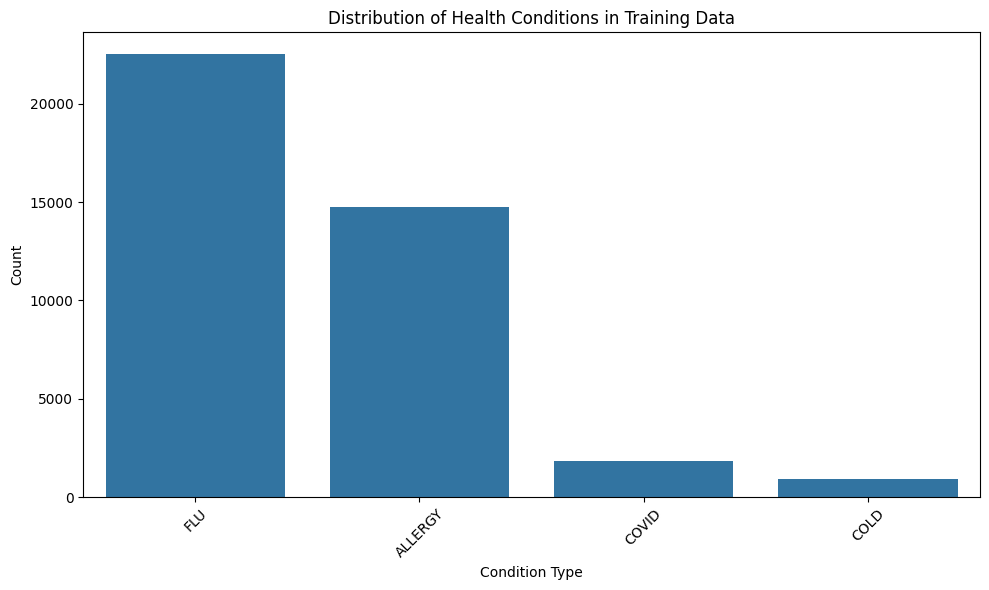

In [ ]:
# Check class distribution with counts and percentages
print("\nClass Distribution in Training Data:")
class_dist = train_data['TYPE'].value_counts()
class_percentages = (class_dist / len(train_data) * 100).round(2)

# Combine counts and percentages in a DataFrame
distribution_df = pd.DataFrame({
    'Count': class_dist,
    'Percentage': class_percentages
})
distribution_df['Distribution'] = distribution_df['Count'].astype(str) + ' (' + distribution_df['Percentage'].astype(str) + '%)'
print(distribution_df['Distribution'])

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title('Distribution of Health Conditions in Training Data')
plt.xlabel('Condition Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Majority class: FLU and Allergy

Minority class: COVID and cold

The training dataset is imbalanced, with a significant skew towards the 'FLU' class, while COVID and COLD are severely underrepresented.
Such an imbalance can bias a classification model towards predicting the majority class, resulting in poor performance for minority classes.

**Check Class Distribution in Training Data**


Class Distribution in testing Data:
TYPE
FLU        2501 (56.25%)
ALLERGY    1652 (37.16%)
COVID        199 (4.48%)
COLD          94 (2.11%)
Name: Distribution, dtype: object


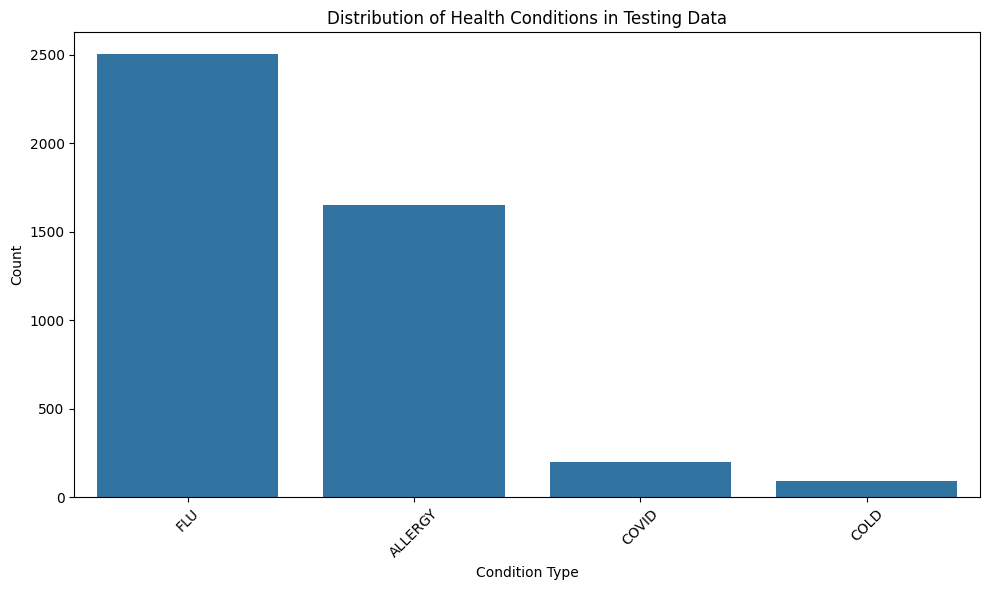

In [ ]:
# Check class distribution with counts and percentages
print("\nClass Distribution in testing Data:")
class_dist = test_data['TYPE'].value_counts()
class_percentages = (class_dist / len(test_data) * 100).round(2)

# Combine counts and percentages in a DataFrame
distribution_df = pd.DataFrame({
    'Count': class_dist,
    'Percentage': class_percentages
})
distribution_df['Distribution'] = distribution_df['Count'].astype(str) + ' (' + distribution_df['Percentage'].astype(str) + '%)'
print(distribution_df['Distribution'])

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title('Distribution of Health Conditions in Testing Data')
plt.xlabel('Condition Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

COUGH                   0.521709
SNEEZING                0.520584
MUSCLE_ACHES            0.520559
SORE_THROAT             0.519034
TIREDNESS               0.518509
RUNNY_NOSE              0.496113
STUFFY_NOSE             0.495488
LOSS_OF_SMELL           0.423376
LOSS_OF_TASTE           0.421526
NAUSEA                  0.324518
SHORTNESS_OF_BREATH     0.324443
DIFFICULTY_BREATHING    0.324168
VOMITING                0.324143
FEVER                   0.323943
DIARRHEA                0.323168
ITCHY_INNER_EAR         0.184618
ITCHY_EYES              0.184468
PINK_EYE                0.183993
ITCHY_NOSE              0.183943
ITCHY_MOUTH             0.183343
dtype: float64


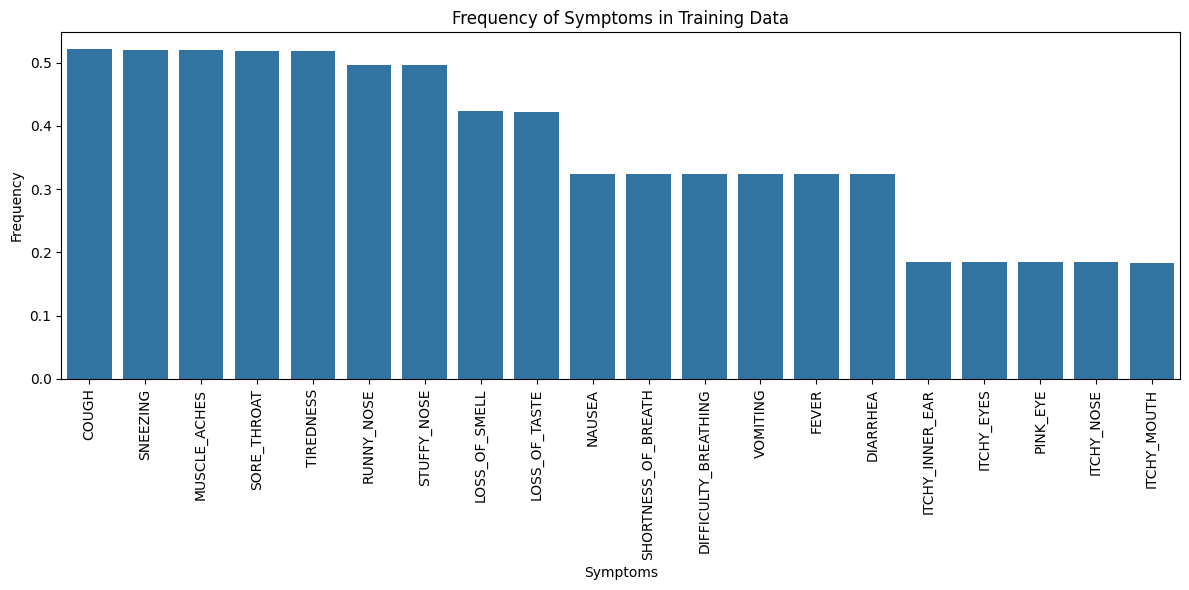

In [ ]:
# Calculate and visualize symptom frequencies
symptom_cols = train_data.columns[:-1]  # All columns except 'TYPE'
symptom_freq = train_data[symptom_cols].mean().sort_values(ascending=False)
print(symptom_freq)
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_freq.index, y=symptom_freq.values)
plt.title('Frequency of Symptoms in Training Data')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Common Symptoms (frequencies > 0.5): TIREDNESS (53.24%), SORE_THROAT (52.23%), MUSCLE_ACHES (51.26%), COUGH (51.12%), and SNEEZING (50.79%)

Moderately Common Symptoms (frequencies ~0.3-0.5): Symptoms like LOSS_OF_TASTE (43.61%), STUFFY_NOSE and running_nose (49.73%), LOSS_OF_TASTE (43.61%), LOSS_OF_SMELL (42.19%), VOMITING, DIFFICULTY_BREATHING, DIARRHEA, NAUSEA, SHORTNESS_OF_BREATH, and FEVER (33.85%) occur less frequently, potentially providing more specific information for certain conditions (e.g., COVID or FLU).

Less Common Symptoms (frequencies < 0.3): ITCHY_MOUTH (19.27%) and PINK_EYE (18.64%) are rare.

**Correlation Matrix of Symptoms**

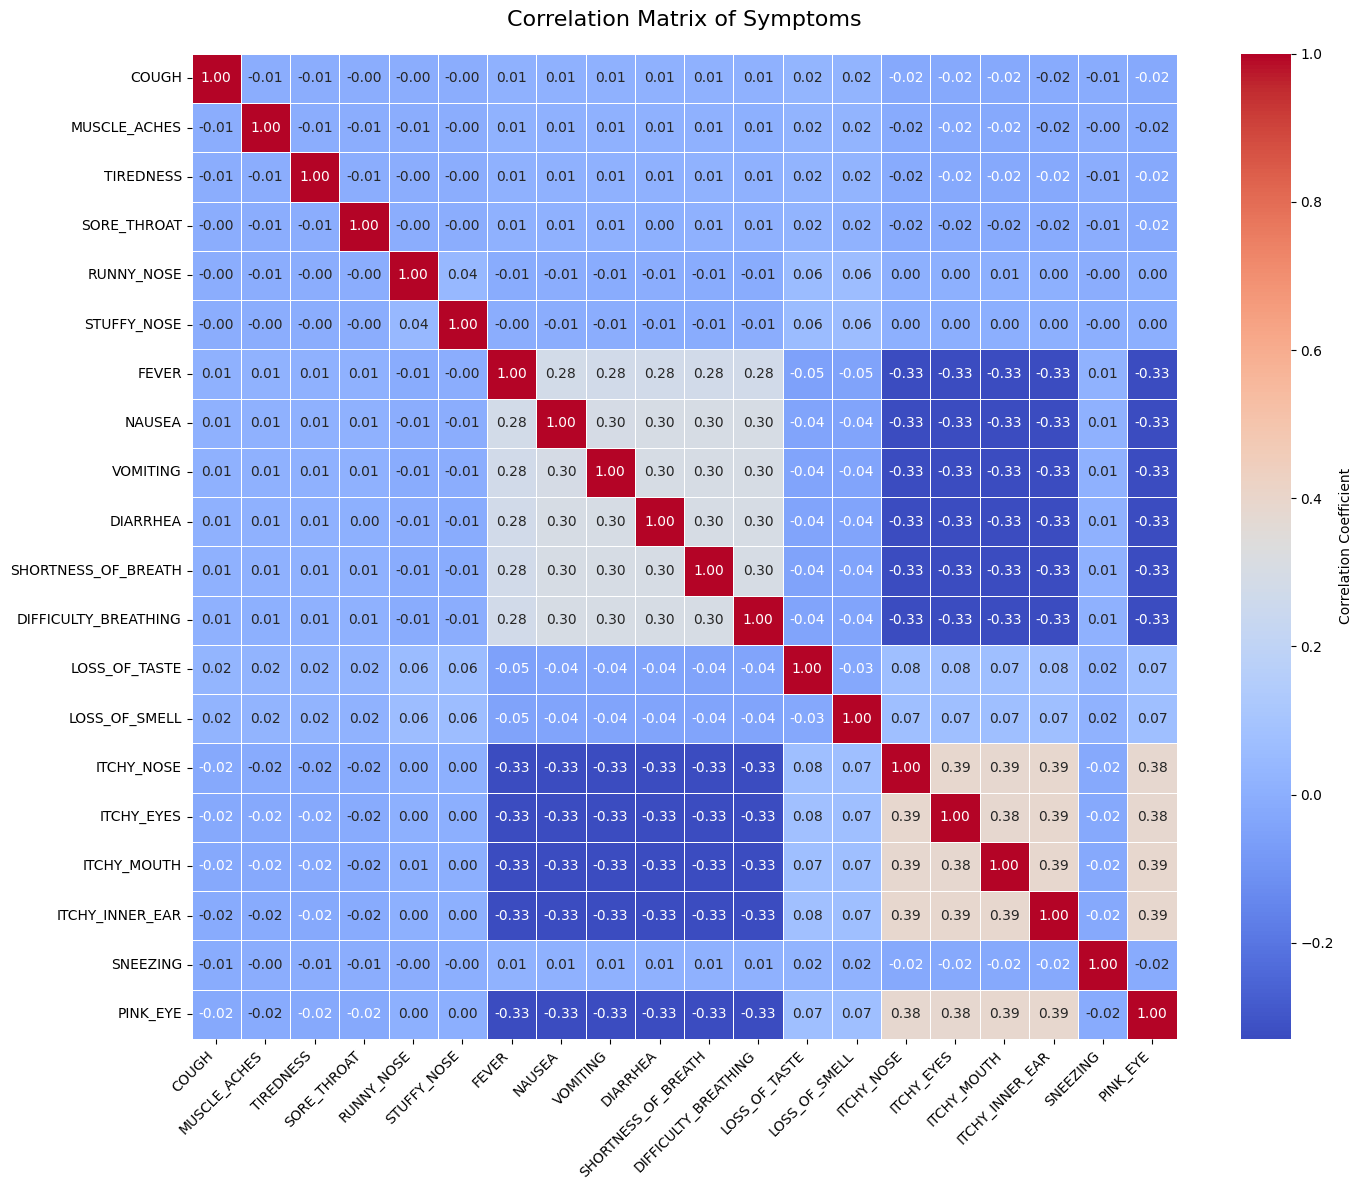

In [ ]:
# Drop the 'TYPE' column for correlation analysis since it's categorical
symptom_data = train_data.drop('TYPE', axis=1)

# Create correlation matrix
plt.figure(figsize=(15, 12))
correlation_matrix = symptom_data.corr()

# Create heatmap with better readability
sns.heatmap(correlation_matrix,
            annot=True,              # Show numbers
            cmap='coolwarm',         # Color scheme
            linewidths=0.5,          # Grid line width
            fmt='.2f',               # Show 2 decimal places
            square=True,             # Make sure it's square
            cbar_kws={'label': 'Correlation Coefficient'})

# Customize the plot
plt.title('Correlation Matrix of Symptoms', pad=20, size=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

Low or Close-to-Zero Correlations: Many correlations between symptoms (e.g., COUGH and MUSCLE_ACHES, TIREDNESS and SORE_THROAT) are close to zero. This suggests little to no linear relationship between these variables.
Example: COUGH and MUSCLE_ACHES have a correlation of -0.0118, indicating almost no relationship.

Positive Correlations:Some symptoms have moderate positive correlations, particularly symptoms often associated together:
FEVER and NAUSEA (0.29): Indicates a moderate likelihood that these symptoms occur together.
FEVER and VOMITING (0.289), DIARRHEA and NAUSEA (0.305): Suggests that gastrointestinal symptoms are somewhat interlinked.

Negative Correlations:Some symptoms show weak negative correlations, particularly for symptoms that are unlikely to occur simultaneously:
Example: ITCHY_NOSE and FEVER have a correlation of -0.343, which might indicate that fever and allergy-related symptoms rarely co-occur.
ITCHY_NOSE and DIARRHEA (-0.334), ITCHY_EYES and NAUSEA (-0.325) also show negative relationships.

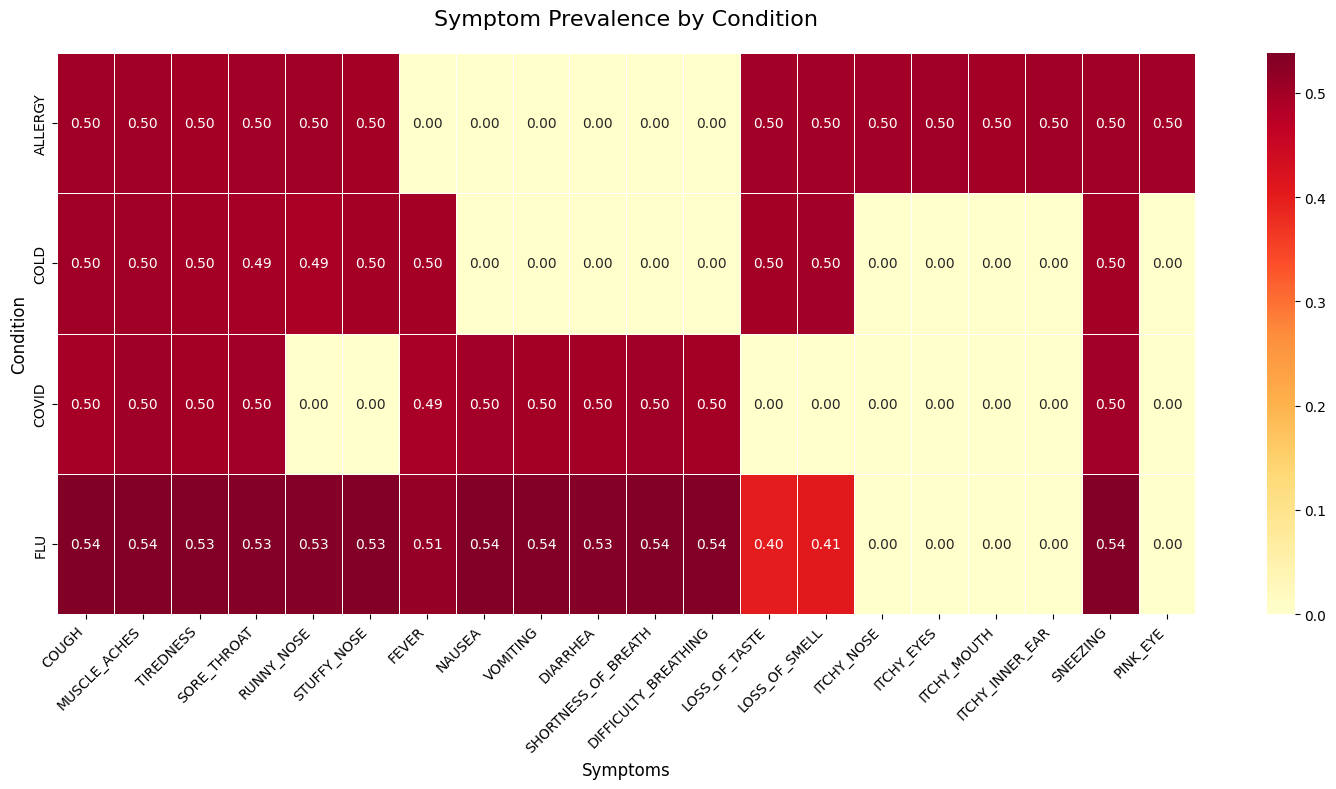


Key Insights:
--------------------------------------------------
Dataset Overview:
• Training samples: 40,007
• Test samples: 4,446
• Number of symptoms: 20

Most Common Symptoms (>50% occurrence):
--------------------------------------------------
• COUGH               : 52.2%
• SNEEZING            : 52.1%
• MUSCLE_ACHES        : 52.1%
• SORE_THROAT         : 51.9%
• TIREDNESS           : 51.9%

Least Common Symptoms (<20% occurrence):
--------------------------------------------------
• ITCHY_MOUTH         : 18.3%
• ITCHY_NOSE          : 18.4%
• PINK_EYE            : 18.4%
• ITCHY_EYES          : 18.4%
• ITCHY_INNER_EAR     : 18.5%

Most Distinctive Symptoms by Condition:
--------------------------------------------------

ALLERGY - Top 10 symptoms:
• MUSCLE_ACHES        : 50.1%
• ITCHY_INNER_EAR     : 50.1%
• ITCHY_EYES          : 50.1%
• SNEEZING            : 50.1%
• COUGH               : 50.1%
• RUNNY_NOSE          : 50.1%
• LOSS_OF_TASTE       : 50.0%
• SORE_THROAT         : 50.

In [ ]:
# Get all symptom columns (excluding 'TYPE')
symptom_cols = [col for col in train_data.columns if col != 'TYPE']

# Calculate the mean occurrence of each symptom per condition
symptoms_by_condition = train_data.groupby('TYPE')[symptom_cols].mean()

# Create heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(symptoms_by_condition,
            annot=True,              # Show numbers
            fmt='.2f',               # Show 2 decimal places
            cmap='YlOrRd',          # Yellow to Red colormap
            linewidths=0.5)         # Add grid lines

plt.title('Symptom Prevalence by Condition', pad=20, size=16)
plt.xlabel('Symptoms', size=12)
plt.ylabel('Condition', size=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate overall symptom frequencies
symptom_freq = train_data[symptom_cols].mean()

# Print comprehensive insights
print("\nKey Insights:")
print("-" * 50)
print(f"Dataset Overview:")
print(f"• Training samples: {len(train_data):,}")
print(f"• Test samples: {len(test_data):,}")
print(f"• Number of symptoms: {len(symptom_cols)}")

print("\nMost Common Symptoms (>50% occurrence):")
print("-" * 50)
for symptom, freq in symptom_freq[symptom_freq > 0.5].sort_values(ascending=False).items():
    print(f"• {symptom:<20}: {freq:.1%}")

print("\nLeast Common Symptoms (<20% occurrence):")
print("-" * 50)
for symptom, freq in symptom_freq[symptom_freq < 0.2].sort_values().items():
    print(f"• {symptom:<20}: {freq:.1%}")

# Print condition-specific insights
print("\nMost Distinctive Symptoms by Condition:")
print("-" * 50)
for condition in symptoms_by_condition.index:
    top_symptoms = symptoms_by_condition.loc[condition].nlargest(10)
    print(f"\n{condition} - Top 10 symptoms:")
    for symptom, value in top_symptoms.items():
        print(f"• {symptom:<20}: {value:.1%}")

Outlier Detection Results:
--------------------------------------------------

FLU:
Total samples: 22499
Outliers detected: 1125 (5.00%)
Contamination used: 0.0500

ALLERGY:
Total samples: 14729
Outliers detected: 1047 (7.11%)
Contamination used: 0.0712

COVID:
Total samples: 1849
Outliers detected: 272 (14.71%)
Contamination used: 0.1500

COLD:
Total samples: 930
Outliers detected: 136 (14.62%)
Contamination used: 0.1500

Final Clean Dataset Distribution:
FLU        21374
ALLERGY    13682
COVID       1577
COLD         794
Name: count, dtype: int64


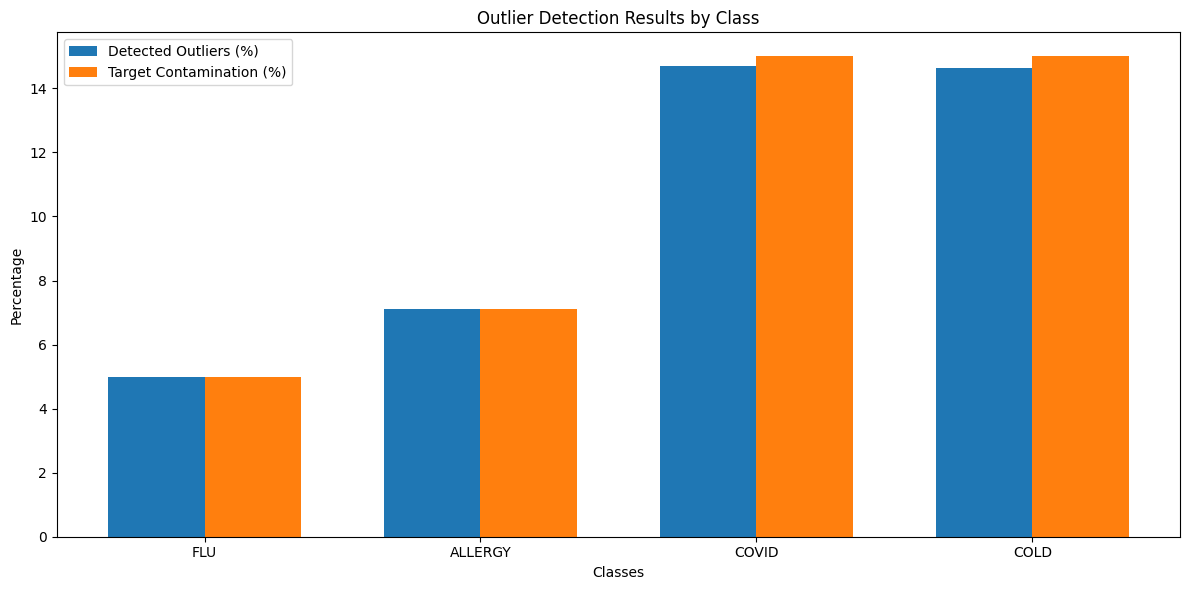


Detailed Statistics:
--------------------------------------------------
Original dataset size: 40007
Cleaned dataset size: 37427
Total outliers removed: 2580
Total outlier percentage: 6.45%


In [ ]:
def improved_outlier_detection(X, y, base_contamination=0.05, max_contamination=0.15):
    """
    Improved outlier detection with logarithmic scaling and balanced contamination

    Parameters:
    X: features DataFrame
    y: target Series (TYPE column)
    base_contamination: base outlier fraction
    max_contamination: maximum allowed contamination
    """
    # Get class sizes for scaling
    class_sizes = pd.Series(y).value_counts()
    max_class_size = class_sizes.max()

    # Calculate contamination rates using logarithmic scaling
    class_contamination = {}
    for cls in class_sizes.index:
        ratio = max_class_size / class_sizes[cls]
        # Logarithmic scaling for smoother values
        contamination = base_contamination * (1 + np.log(ratio))
        # Cap at max_contamination
        class_contamination[cls] = min(contamination, max_contamination)

    # Store results
    cleaned_data = []
    cleaned_labels = []
    detection_stats = {}

    print("Outlier Detection Results:")
    print("-" * 50)

    # Process each class separately
    for class_name in class_sizes.index:
        # Get class-specific data
        mask = y == class_name
        X_class = X[mask]

        # Initialize Isolation Forest with class-specific contamination
        iso = IsolationForest(
            contamination=class_contamination[class_name],
            random_state=42,
            n_estimators=100,
            bootstrap=True
        )

        # Detect outliers
        labels = iso.fit_predict(X_class)
        n_outliers = sum(labels == -1)

        # Store statistics
        detection_stats[class_name] = {
            'total_samples': len(X_class),
            'outliers': n_outliers,
            'outlier_percentage': (n_outliers/len(X_class))*100,
            'contamination_used': class_contamination[class_name]
        }

        # Store clean data
        cleaned_data.append(X_class[labels == 1])
        cleaned_labels.extend([class_name] * sum(labels == 1))

        # Print results for this class
        print(f"\n{class_name}:")
        print(f"Total samples: {len(X_class)}")
        print(f"Outliers detected: {n_outliers} ({(n_outliers/len(X_class))*100:.2f}%)")
        print(f"Contamination used: {class_contamination[class_name]:.4f}")

    # Combine cleaned data
    X_cleaned = pd.concat(cleaned_data)
    y_cleaned = pd.Series(cleaned_labels)

    print("\nFinal Clean Dataset Distribution:")
    print(pd.Series(cleaned_labels).value_counts())

    # Visualize results
    plt.figure(figsize=(12, 6))

    # Create comparison data
    class_names = list(detection_stats.keys())
    outlier_rates = [stats['outlier_percentage'] for stats in detection_stats.values()]
    contamination_rates = [stats['contamination_used'] * 100 for stats in detection_stats.values()]

    # Plot comparison
    x = np.arange(len(class_names))
    width = 0.35

    plt.bar(x - width/2, outlier_rates, width, label='Detected Outliers (%)')
    plt.bar(x + width/2, contamination_rates, width, label='Target Contamination (%)')
    plt.xlabel('Classes')
    plt.ylabel('Percentage')
    plt.title('Outlier Detection Results by Class')
    plt.xticks(x, class_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return X_cleaned, y_cleaned, detection_stats

# Apply the improved outlier detection
X = train_data.drop('TYPE', axis=1)
y = train_data['TYPE']

# Get clean dataset
X_clean, y_clean, stats = improved_outlier_detection(X, y)

# Print summary statistics
print("\nDetailed Statistics:")
print("-" * 50)
print(f"Original dataset size: {len(X)}")
print(f"Cleaned dataset size: {len(X_clean)}")
print(f"Total outliers removed: {len(X) - len(X_clean)}")

# Calculate total outlier percentage
total_outlier_percent = ((len(X) - len(X_clean)) / len(X)) * 100
print(f"Total outlier percentage: {total_outlier_percent:.2f}%")



Class Distribution Metrics:
--------------------------------------------------
Before balancing (after outlier removal):
FLU: 21374 samples (57.11%)
ALLERGY: 13682 samples (36.56%)
COVID: 1577 samples (4.21%)
COLD: 794 samples (2.12%)

After ADASYN balancing:
FLU: 21374 samples (24.93%)
ALLERGY: 21635 samples (25.23%)
COVID: 21482 samples (25.05%)
COLD: 21254 samples (24.79%)

Data Quality Metrics:
--------------------------------------------------
Binary nature preserved in all features

Performance Impact Metrics:
--------------------------------------------------
Before balancing - Balanced Accuracy: 0.587 (±0.007)
After balancing  - Balanced Accuracy: 0.872 (±0.045)

Synthetic Samples Added:
--------------------------------------------------
FLU: 0 samples added (0.00% increase)
ALLERGY: 7953 samples added (58.13% increase)
COVID: 19905 samples added (1262.21% increase)
COLD: 20460 samples added (2576.83% increase)


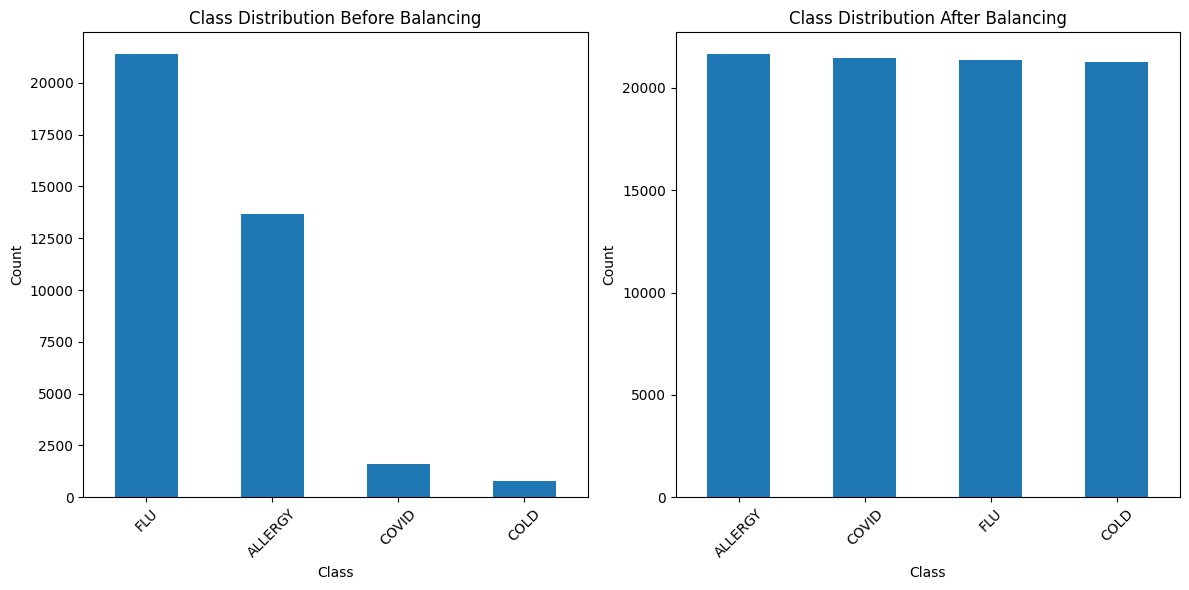


Detailed Performance Summary:
--------------------------------------------------
Processing Time: 15.85 seconds
Imbalance Ratio - Before: 26.92
Imbalance Ratio - After: 1.02
Binary Nature Preserved: True
Balanced Accuracy Improvement: 0.285


In [ ]:
def balance_medical_data_with_metrics(X_clean, y_clean, sampling_strategy='auto', n_neighbors=5):
    """
    Balance medical data using ADASYN with correct implementation
    """
    metrics = {}
    start_time = time.time()

    # Initialize ADASYN with correct parameters
    adasyn = ADASYN(
        sampling_strategy=sampling_strategy,
        random_state=42,
        n_neighbors=n_neighbors
    )

    # Fit and resample
    X_balanced, y_balanced = adasyn.fit_resample(X_clean, y_clean)

    processing_time = time.time() - start_time
    metrics['processing_time'] = processing_time

    # Print distribution metrics
    print("\nClass Distribution Metrics:")
    print("-" * 50)

    original_counts = Counter(y_clean)
    original_dist = {cls: count/len(y_clean) for cls, count in original_counts.items()}

    balanced_counts = Counter(y_balanced)
    balanced_dist = {cls: count/len(y_balanced) for cls, count in balanced_counts.items()}

    print("Before balancing (after outlier removal):")
    for cls, count in original_counts.items():
        print(f"{cls}: {count} samples ({original_dist[cls]*100:.2f}%)")

    print("\nAfter ADASYN balancing:")
    for cls, count in balanced_counts.items():
        print(f"{cls}: {count} samples ({balanced_dist[cls]*100:.2f}%)")

    # Calculate imbalance metrics
    def calculate_imbalance_ratio(class_dist):
        max_class = max(class_dist.values())
        min_class = min(class_dist.values())
        return max_class/min_class if min_class > 0 else float('inf')

    metrics['imbalance_ratio'] = {
        'before': calculate_imbalance_ratio(original_dist),
        'after': calculate_imbalance_ratio(balanced_dist)
    }

    # Verify binary nature
    print("\nData Quality Metrics:")
    print("-" * 50)
    non_binary = (X_balanced != 0) & (X_balanced != 1)
    if non_binary.any().any():
        print("Warning: Non-binary values detected!")
        affected_cols = X_balanced.columns[non_binary.any(axis=0)].tolist()
        print(f"Affected columns: {affected_cols}")
        metrics['binary_preserved'] = False
        metrics['affected_columns'] = affected_cols
    else:
        print("Binary nature preserved in all features")
        metrics['binary_preserved'] = True

    # Evaluate model performance
    print("\nPerformance Impact Metrics:")
    print("-" * 50)

    def evaluate_model(X, y):
        clf = RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        )
        scores = cross_val_score(clf, X, y, cv=5, scoring='balanced_accuracy')
        return scores.mean(), scores.std()

    original_score, original_std = evaluate_model(X_clean, y_clean)
    balanced_score, balanced_std = evaluate_model(X_balanced, y_balanced)

    metrics['model_performance'] = {
        'before': {'score': original_score, 'std': original_std},
        'after': {'score': balanced_score, 'std': balanced_std}
    }

    print(f"Before balancing - Balanced Accuracy: {original_score:.3f} (±{original_std:.3f})")
    print(f"After balancing  - Balanced Accuracy: {balanced_score:.3f} (±{balanced_std:.3f})")

    # Calculate summary metrics
    metrics['summary'] = {
        'total_samples': {
            'before': len(y_clean),
            'after': len(y_balanced)
        },
        'synthetic_samples': len(y_balanced) - len(y_clean),
        'processing_time': processing_time,
        'balanced_accuracy_improvement': balanced_score - original_score
    }

    # Print synthetic samples analysis
    print("\nSynthetic Samples Added:")
    print("-" * 50)
    for cls in balanced_counts.keys():
        original = original_counts.get(cls, 0)
        balanced = balanced_counts.get(cls, 0)
        synthetic = balanced - original
        if original > 0:  # Avoid division by zero
            increase_percent = (synthetic/original*100)
            print(f"{cls}: {synthetic} samples added ({increase_percent:.2f}% increase)")

    # Plot class distribution
    plt.figure(figsize=(12, 6))

    # Plot before balancing
    plt.subplot(1, 2, 1)
    pd.Series(y_clean).value_counts().plot(kind='bar')
    plt.title('Class Distribution Before Balancing')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Plot after balancing
    plt.subplot(1, 2, 2)
    pd.Series(y_balanced).value_counts().plot(kind='bar')
    plt.title('Class Distribution After Balancing')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Return balanced data and metrics
    X_balanced = pd.DataFrame(X_balanced, columns=X_clean.columns)
    y_balanced = pd.Series(y_balanced, name=y_clean.name)

    return X_balanced, y_balanced, metrics

# Apply ADASYN to cleaned data
X_balanced, y_balanced, metrics = balance_medical_data_with_metrics(X_clean, y_clean)

# Print detailed summary
print("\nDetailed Performance Summary:")
print("-" * 50)
print(f"Processing Time: {metrics['processing_time']:.2f} seconds")
print(f"Imbalance Ratio - Before: {metrics['imbalance_ratio']['before']:.2f}")
print(f"Imbalance Ratio - After: {metrics['imbalance_ratio']['after']:.2f}")
print(f"Binary Nature Preserved: {metrics['binary_preserved']}")
print(f"Balanced Accuracy Improvement: {metrics['summary']['balanced_accuracy_improvement']:.3f}")

Total dataset size post-ADASYN: 85493 samples


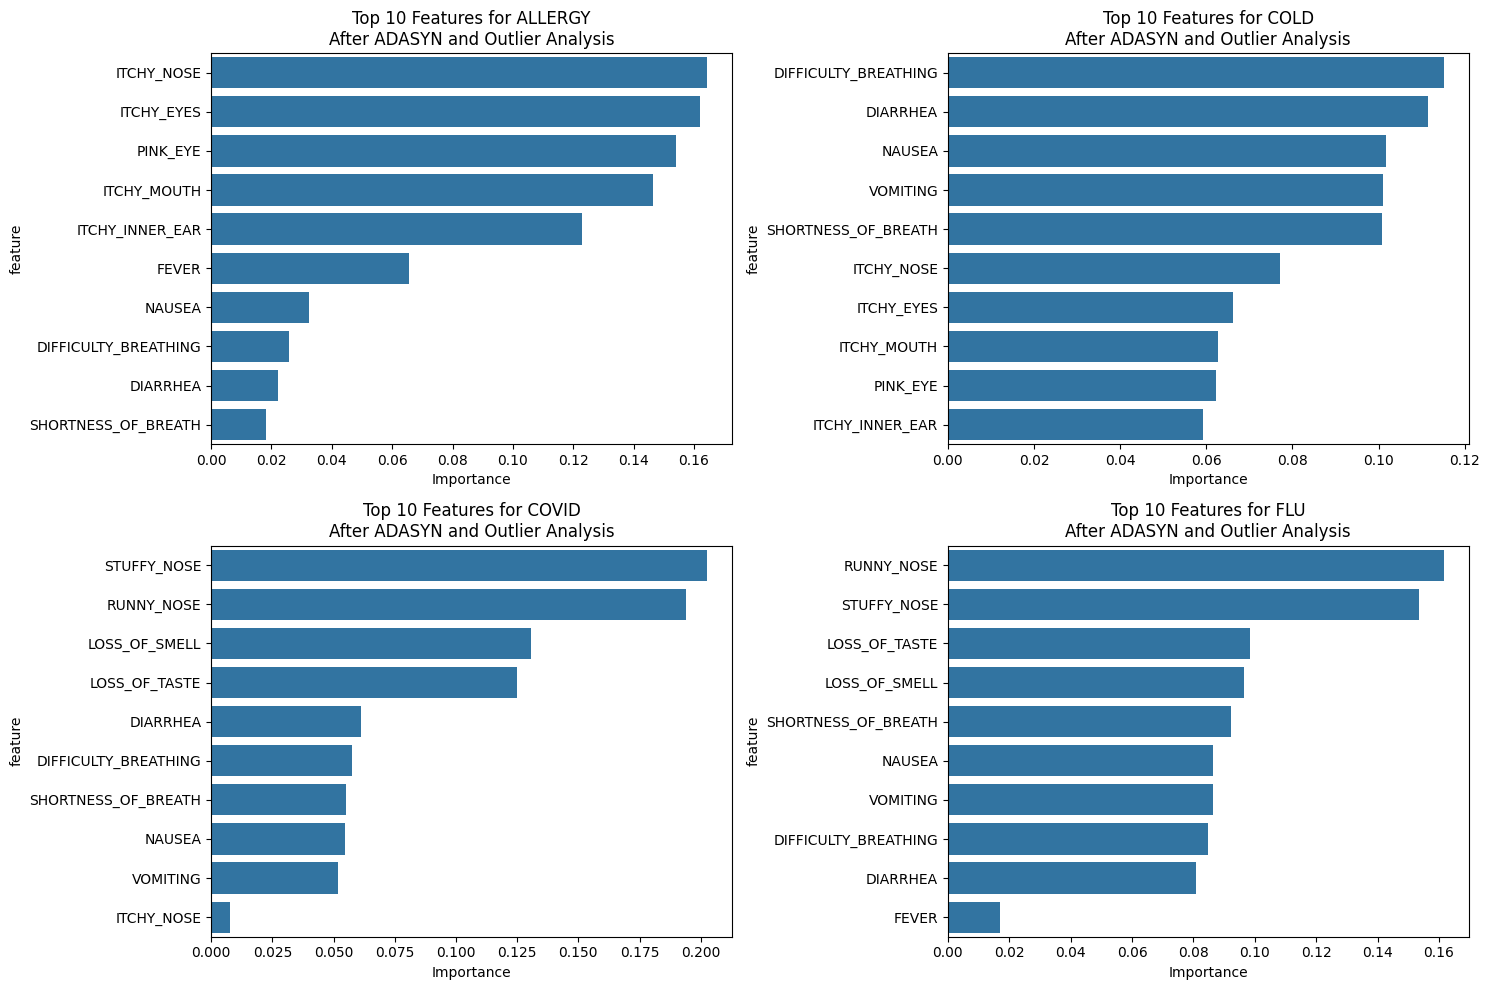


Top 10 Important Features by Class (Post-ADASYN):
--------------------------------------------------

ALLERGY:
ITCHY_NOSE: 0.1643
ITCHY_EYES: 0.1621
PINK_EYE: 0.1542
ITCHY_MOUTH: 0.1464
ITCHY_INNER_EAR: 0.1229
FEVER: 0.0655
NAUSEA: 0.0325
DIFFICULTY_BREATHING: 0.0259
DIARRHEA: 0.0222
SHORTNESS_OF_BREATH: 0.0183

COLD:
DIFFICULTY_BREATHING: 0.1151
DIARRHEA: 0.1116
NAUSEA: 0.1017
VOMITING: 0.1009
SHORTNESS_OF_BREATH: 0.1009
ITCHY_NOSE: 0.0771
ITCHY_EYES: 0.0661
ITCHY_MOUTH: 0.0626
PINK_EYE: 0.0623
ITCHY_INNER_EAR: 0.0591

COVID:
STUFFY_NOSE: 0.2026
RUNNY_NOSE: 0.1941
LOSS_OF_SMELL: 0.1307
LOSS_OF_TASTE: 0.1251
DIARRHEA: 0.0610
DIFFICULTY_BREATHING: 0.0576
SHORTNESS_OF_BREATH: 0.0550
NAUSEA: 0.0545
VOMITING: 0.0518
ITCHY_NOSE: 0.0077

FLU:
RUNNY_NOSE: 0.1615
STUFFY_NOSE: 0.1535
LOSS_OF_TASTE: 0.0983
LOSS_OF_SMELL: 0.0963
SHORTNESS_OF_BREATH: 0.0923
NAUSEA: 0.0865
VOMITING: 0.0863
DIFFICULTY_BREATHING: 0.0846
DIARRHEA: 0.0808
FEVER: 0.0169


In [ ]:
def analyze_balanced_data(X_balanced, y_balanced):
    """
    Comprehensive analysis of balanced data with focus on class characteristics
    """

    # Print the total dataset size post-ADASYN
    print(f"Total dataset size post-ADASYN: {X_balanced.shape[0]} samples")


    # 1. Class-Specific Feature Importance
    def analyze_features_by_class():
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        class_feature_importance = {}

        for class_name in np.unique(y_balanced):
            # Binary classification for each class
            y_binary = (y_balanced == class_name).astype(int)
            rf.fit(X_balanced, y_binary)

            # Get and store importance
            importance = pd.DataFrame({
                'feature': X_balanced.columns,
                'importance': rf.feature_importances_
            }).sort_values('importance', ascending=False)

            class_feature_importance[class_name] = importance

        # Visualize feature importance without the 'palette' argument to avoid warning
        plt.figure(figsize=(15, 10))
        for i, (class_name, importance) in enumerate(class_feature_importance.items(), 1):
            plt.subplot(2, 2, i)
            sns.barplot(x='importance', y='feature',
                       data=importance.head(10))  # Removed 'palette' argument
            plt.title(f'Top 10 Features for {class_name}\nAfter ADASYN and Outlier Analysis')
            plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()

        # Print top features considering outlier analysis results
        print("\nTop 10 Important Features by Class (Post-ADASYN):")
        print("-" * 50)
        for class_name, importance in class_feature_importance.items():
            print(f"\n{class_name}:")
            top_10 = importance.head(10)
            for _, row in top_10.iterrows():
                print(f"{row['feature']}: {row['importance']:.4f}")

        return class_feature_importance

    # Run the feature importance analysis
    feature_importance = analyze_features_by_class()

    return {
        'feature_importance': feature_importance,
    }

# Example call assuming X_balanced and y_balanced are already defined
analysis_results = analyze_balanced_data(X_balanced, y_balanced)



# **Decision Tree Model**

Using ADASYN balanced data...

Class distribution for entire dataset (ADASYN balanced):
ALLERGY    21454
COVID      21441
FLU        21374
COLD       21224
Name: count, dtype: int64

Class distribution for training set:
ALLERGY    17163
COVID      17153
FLU        17099
COLD       16979
Name: count, dtype: int64

Class distribution for test set:
ALLERGY    4291
COVID      4288
FLU        4275
COLD       4245
Name: count, dtype: int64

Performing grid search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 50}
Best cross-validation accuracy: 0.9068

Decision Tree Performance:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.77      0.87      4291
        COLD       0.77      0.99      0.87      4245
       COVID       0.91      0.95      0.93      4288
         FLU       1.00      0.90      0.95      427

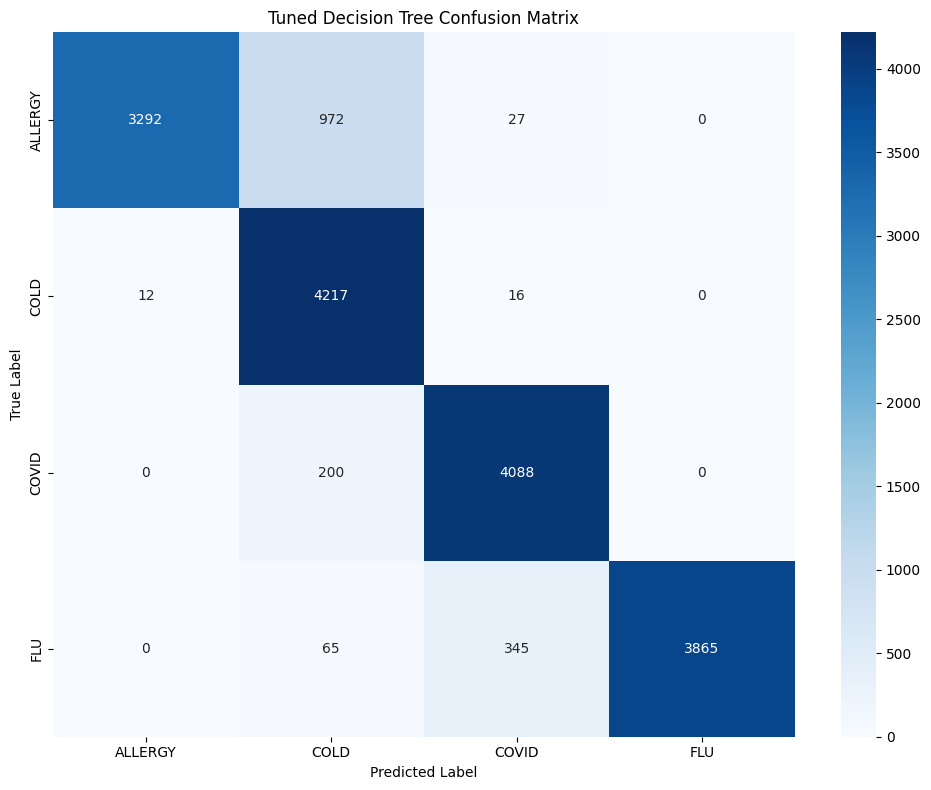

In [ ]:


def create_advanced_features(X):
    """Create enhanced features with focus on discrimination."""
    X_enhanced = X.copy()

    X_enhanced['allergy_primary'] = X_enhanced[['ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH']].mean(axis=1)
    X_enhanced['allergy_secondary'] = X_enhanced[['PINK_EYE', 'ITCHY_INNER_EAR']].mean(axis=1)
    X_enhanced['cold_primary'] = X_enhanced[['STUFFY_NOSE', 'RUNNY_NOSE']].mean(axis=1)
    X_enhanced['cold_secondary'] = X_enhanced[['SNEEZING', 'COUGH']].mean(axis=1)

    X_enhanced['allergy_intensity'] = X_enhanced['allergy_primary'] * X_enhanced['allergy_secondary']
    X_enhanced['cold_intensity'] = X_enhanced['cold_primary'] * X_enhanced['cold_secondary']

    X_enhanced['covid_score'] = X_enhanced[['LOSS_OF_TASTE', 'LOSS_OF_SMELL', 'DIFFICULTY_BREATHING']].mean(axis=1)
    X_enhanced['flu_score'] = X_enhanced[['FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA']].mean(axis=1)

    return X_enhanced

def compute_balanced_weights(y):
    classes = np.unique(y)
    weights = compute_class_weight('balanced', classes=classes, y=y)
    return dict(zip(range(len(classes)), weights))

def display_class_distribution(y, description):
    """Display the class distribution."""
    print(f"\nClass distribution for {description}:")
    print(y.value_counts())

class DecisionTreeModel:
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()

        # Define hyperparameter grid
        self.param_grid = {
            'max_depth': [5,10],
            'min_samples_split': [50],
            'min_samples_leaf': [10, 20],
            'max_features': ['sqrt', 'log2', None],
            'criterion': ['gini', 'entropy']
        }

    def fit_and_evaluate(self, X_balanced, y_balanced):
        # Display class distribution for the entire dataset
        display_class_distribution(y_balanced, "entire dataset (ADASYN balanced)")

        # Feature enhancement
        X_enhanced = create_advanced_features(X_balanced)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_enhanced, y_balanced,
            test_size=0.2,
            random_state=self.random_state,
            stratify=y_balanced
        )

        # Display class distribution after train-test split
        display_class_distribution(y_train, "training set")
        display_class_distribution(y_test, "test set")

        # Label encoding
        y_train_encoded = self.label_encoder.fit_transform(y_train)
        y_test_encoded = self.label_encoder.transform(y_test)

        # Feature scaling
        X_train_scaled = pd.DataFrame(
            self.scaler.fit_transform(X_train),
            columns=X_train.columns
        )
        X_test_scaled = pd.DataFrame(
            self.scaler.transform(X_test),
            columns=X_test.columns
        )

        # Compute class weights
        class_weights = compute_balanced_weights(y_train_encoded)

        # Initialize base model
        dt_model = DecisionTreeClassifier(
            random_state=self.random_state,
            class_weight=class_weights
        )

        # Grid search
        print("\nPerforming grid search...")
        grid_search = GridSearchCV(
            estimator=dt_model,
            param_grid=self.param_grid,
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )

        # Fit grid search
        grid_search.fit(X_train_scaled, y_train_encoded)

        # Print best parameters
        print("\nBest parameters found:", grid_search.best_params_)
        print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

        # Get best model
        best_model = grid_search.best_estimator_

        # Make predictions
        y_pred_encoded = best_model.predict(X_test_scaled)
        y_pred = self.label_encoder.inverse_transform(y_pred_encoded)

        # Print performance metrics
        print(f"\nDecision Tree Performance:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['ALLERGY', 'COLD', 'COVID', 'FLU'],
                   yticklabels=['ALLERGY', 'COLD', 'COVID', 'FLU'])
        plt.title('Tuned Decision Tree Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()

        # # Feature importance
        # feature_importance = pd.DataFrame({
        #     'feature': X_train.columns,
        #     'importance': best_model.feature_importances_
        # }).sort_values('importance', ascending=False)

        # print("\nTop 10 Most Important Features:")
        # print(feature_importance.head(10))

        return best_model, y_pred, grid_search.best_params_

# Use ADASYN-balanced data directly
print("Using ADASYN balanced data...")
# Assuming X_balanced and y_balanced are the outputs from ADASYN
dt_model = DecisionTreeModel()
best_model, predictions, best_params = dt_model.fit_and_evaluate(X_balanced, y_balanced)


# Stacking Ensemble (LightBM, Random Forest and Logical regression)

Use stacking ensemble combines predictions from multiple models to achieve better performance. Here a stacking ensemble created with LightGBM, Random Forest, and Logistic Regression



Balancing data using ADASYN...

Class distribution for entire dataset (ADASYN balanced):
TYPE
COVID      22884
ALLERGY    22677
COLD       22575
FLU        22499
Name: count, dtype: int64

Class distribution for training set:
TYPE
COVID      18307
ALLERGY    18142
COLD       18060
FLU        17999
Name: count, dtype: int64

Class distribution for test set:
TYPE
COVID      4577
ALLERGY    4535
COLD       4515
FLU        4500
Name: count, dtype: int64

Stacking Classifier Cross-Validation Accuracy: 0.9233 ± 0.0023


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Stacking Classifier Performance:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.84      0.91      4535
        COLD       0.82      0.99      0.90      4515
       COVID       0.93      0.96      0.94      4577
         FLU       1.00      0.91      0.95      4500

    accuracy                           0.92     18127
   macro avg       0.93      0.92      0.92     18127
weighted avg       0.93      0.92      0.92     18127



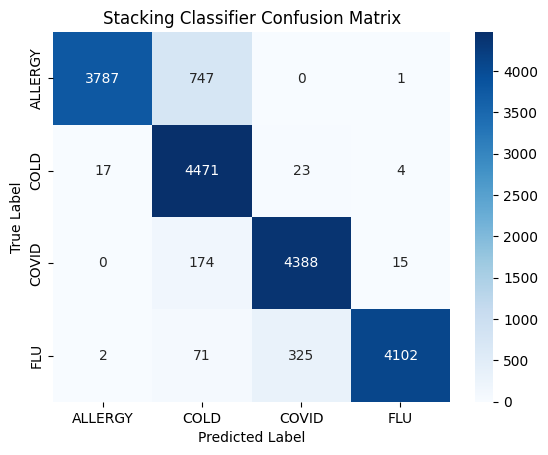

In [ ]:




# Define feature engineering function
def create_advanced_features(X):
    """Create enhanced features with focus on discrimination."""
    X_enhanced = X.copy()
    X_enhanced['allergy_primary'] = X_enhanced[['ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH']].mean(axis=1)
    X_enhanced['allergy_secondary'] = X_enhanced[['PINK_EYE', 'ITCHY_INNER_EAR']].mean(axis=1)
    X_enhanced['cold_primary'] = X_enhanced[['STUFFY_NOSE', 'RUNNY_NOSE']].mean(axis=1)
    X_enhanced['cold_secondary'] = X_enhanced[['SNEEZING', 'COUGH']].mean(axis=1)

    X_enhanced['allergy_intensity'] = X_enhanced['allergy_primary'] * X_enhanced['allergy_secondary']
    X_enhanced['cold_intensity'] = X_enhanced['cold_primary'] * X_enhanced['cold_secondary']

    X_enhanced['covid_score'] = X_enhanced[['LOSS_OF_TASTE', 'LOSS_OF_SMELL', 'DIFFICULTY_BREATHING']].mean(axis=1)
    X_enhanced['flu_score'] = X_enhanced[['FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA']].mean(axis=1)
    return X_enhanced

# Compute class weights for balanced datasets
def compute_balanced_weights(y):
    classes = np.unique(y)
    weights = compute_class_weight('balanced', classes=classes, y=y)
    return dict(zip(range(len(classes)), weights))

# Define advanced ensemble models
class AdvancedEnsembleModels:
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()

    def create_stacking_classifier(self, class_weights):
        estimators = [
            ('rf', RandomForestClassifier(
                n_estimators=150, max_depth=12, class_weight=class_weights, random_state=self.random_state, n_jobs=-1
            )),
            ('lgb', lgb.LGBMClassifier(
                n_estimators=150, max_depth=6, learning_rate=0.1, random_state=self.random_state, n_jobs=-1
            ))
        ]
        final_estimator = LogisticRegression(
            max_iter=2000, multi_class='multinomial', class_weight=class_weights, random_state=self.random_state, n_jobs=-1
        )
        return StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5, n_jobs=-1)

    def fit_and_evaluate(self, X, y):
        # Feature enhancement
        X_enhanced = create_advanced_features(X)

        # ADASYN balancing
        print("Balancing data using ADASYN...")
        adasyn = ADASYN(random_state=self.random_state)
        X_balanced, y_balanced = adasyn.fit_resample(X_enhanced, y)

        # Class distribution for entire dataset
        print("\nClass distribution for entire dataset (ADASYN balanced):")
        print(pd.Series(y_balanced).value_counts())

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_balanced, y_balanced, test_size=0.2, random_state=self.random_state, stratify=y_balanced
        )

        # Class distributions for training and test sets
        print("\nClass distribution for training set:")
        print(pd.Series(y_train).value_counts())

        print("\nClass distribution for test set:")
        print(pd.Series(y_test).value_counts())

        # Label encoding
        y_train_encoded = self.label_encoder.fit_transform(y_train)
        y_test_encoded = self.label_encoder.transform(y_test)

        # Feature scaling
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Class weights
        class_weights = compute_balanced_weights(y_train_encoded)

        # Initialize models
        model = self.create_stacking_classifier(class_weights)

        # Cross-validation setup
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)

        # Cross-validation to evaluate model performance
        cv_scores = cross_val_score(model, X_train_scaled, y_train_encoded, cv=cv, scoring=make_scorer(accuracy_score), n_jobs=-1)

        # Print cross-validation results
        print(f"\nStacking Classifier Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

        # Train the model
        model.fit(X_train_scaled, y_train_encoded)
        y_pred_encoded = model.predict(X_test_scaled)
        y_pred = self.label_encoder.inverse_transform(y_pred_encoded)

        # Print performance report
        print(f"\nStacking Classifier Performance:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)

        # Specify your class labels
        class_labels = ['ALLERGY', 'COLD', 'COVID', 'FLU']

        # Plot confusion matrix with labels
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
        plt.title('Stacking Classifier Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

# Assuming X and y are preloaded
ensemble_models = AdvancedEnsembleModels()
ensemble_models.fit_and_evaluate(X, y)


# Clustering

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import silhouette_score, adjusted_rand_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture

In [ ]:
print(X.shape)
print(X_clean.shape)
print(X_balanced.shape)

(40007, 20)
(37427, 20)
(85745, 20)


### Undersampling

In [ ]:
# Define the sampler
rus = RandomUnderSampler(random_state=42)

# Apply to the dataset
X_resampled, y_resampled = rus.fit_resample(X_clean, y_clean)

print("Class distribution after under-sampling:", Counter(y_resampled))
print(X_resampled.shape)

Class distribution after under-sampling: Counter({'ALLERGY': 794, 'COLD': 794, 'COVID': 794, 'FLU': 794})
(3176, 20)


In [ ]:
# Transform string labels to numeric
label_encoder = LabelEncoder()

y_original_numeric = label_encoder.fit_transform(y_clean)
y_oversampling_numeric = label_encoder.fit_transform(y_balanced)
y_undersampling_numeric = label_encoder.fit_transform(y_resampled)

## K-means

In [ ]:
# original dataset
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels_original = kmeans.fit_predict(X_clean)

# oversampling dataset
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels_oversampling = kmeans.fit_predict(X_balanced)

# undersampling dataset
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels_undersampling = kmeans.fit_predict(X_resampled)

In [ ]:
print("original dataset:")
print("Silhouette Score:", silhouette_score(X_clean, kmeans_labels_original))
print("Adjusted Rand Index:", adjusted_rand_score(y_original_numeric, kmeans_labels_original))

original dataset:
Silhouette Score: 0.05606683402435611
Adjusted Rand Index: 0.4174204049163252


In [ ]:
print("oversampling dataset:")
print("Silhouette Score:", silhouette_score(X_balanced, kmeans_labels_oversampling))
print("Adjusted Rand Index:", adjusted_rand_score(y_oversampling_numeric, kmeans_labels_oversampling))

oversampling dataset:
Silhouette Score: 0.09524335367231657
Adjusted Rand Index: 0.5266864834834505


In [ ]:
print("undersampling dataset:")
print("Silhouette Score:", silhouette_score(X_resampled, kmeans_labels_undersampling))
print("Adjusted Rand Index:", adjusted_rand_score(y_undersampling_numeric, kmeans_labels_undersampling))

undersampling dataset:
Silhouette Score: 0.07027156092017647
Adjusted Rand Index: 0.5479669581474352


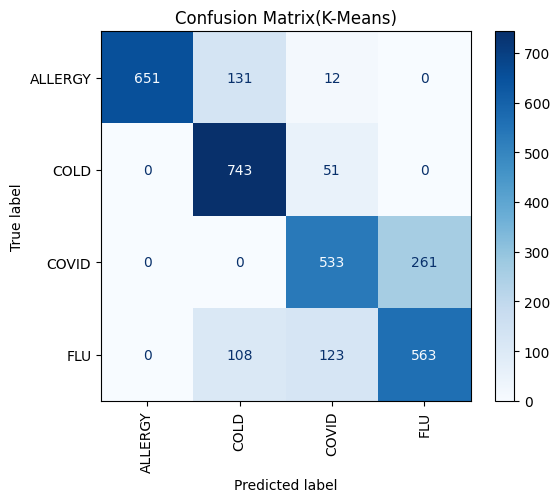

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_undersampling_numeric, kmeans_labels_undersampling)

# Use Hungarian Algorithm to maximize the diagonal
row_ind, col_ind = linear_sum_assignment(-conf_matrix)  # Negative because we want to maximize

# Remap cluster labels to maximize diagonal
mapping = dict(zip(col_ind, row_ind))
mapped_labels = np.array([mapping[label] for label in kmeans_labels_undersampling])

# Generate confusion matrix after remapping
remapped_conf_matrix = confusion_matrix(y_undersampling_numeric, mapped_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=remapped_conf_matrix, display_labels=np.unique(y_resampled))
disp.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix(K-Means)")
plt.show()

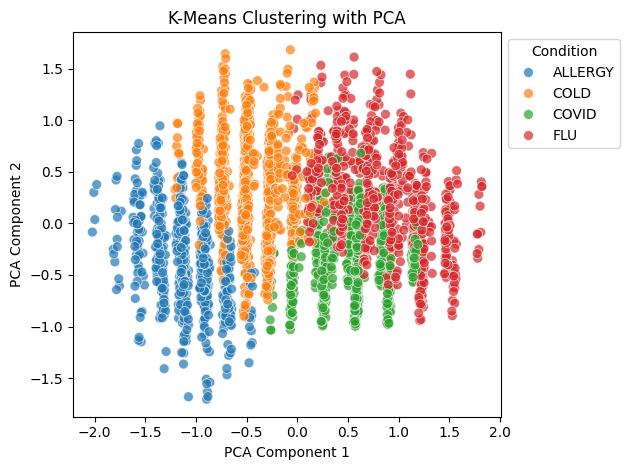

In [ ]:
from sklearn.decomposition import PCA

# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Map numeric cluster labels to string labels
unique_classes = np.unique(y_resampled)
cluster_to_class_mapping = {cluster: unique_classes[true_class] for cluster, true_class in mapping.items()}
string_labels = [cluster_to_class_mapping[label] for label in kmeans_labels_undersampling]

# Visualize the clustering results with string labels
plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=string_labels, palette="tab10", s=50, alpha=0.7)
plt.title("K-Means Clustering with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Condition", loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## Agglomerative clustering

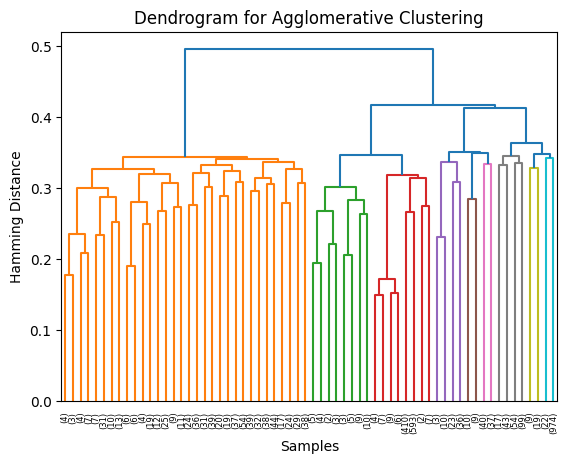

In [ ]:
from scipy.spatial.distance import pdist, squareform

distance_matrix = squareform(pdist(X_resampled, metric="hamming"))

# Perform Agglomerative Clustering
agglomerative = AgglomerativeClustering(
        n_clusters=4,
        metric="precomputed",
        linkage="average"
    )
agglomerative_labels = agglomerative.fit_predict(distance_matrix)

# add cluster labels to the dataset for analysis
X_with_cluster = X_resampled.copy()
X_with_cluster['Cluster'] = agglomerative_labels

# Dendrogram Visualization
linkage_matrix = linkage(pdist(X_with_cluster, metric="hamming"), method="average")
plt.figure()
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel(f"Hamming Distance")
plt.show()

In [ ]:
# Evaluate clustering using Silhouette Score
sil_score = silhouette_score(distance_matrix, agglomerative_labels, metric="precomputed")
print(f"Silhouette Score: {sil_score}")

# Calculate Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(y_resampled, agglomerative_labels)
print(f"Adjusted Rand Index (ARI): {ari_score}")

Silhouette Score: 0.13581427482086084
Adjusted Rand Index (ARI): 0.5424885536081365


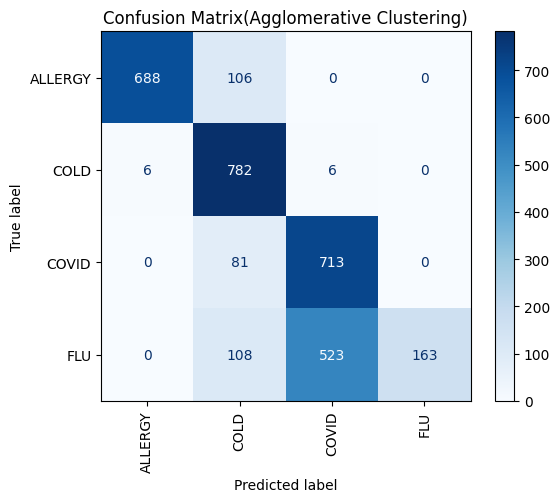

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_undersampling_numeric, agglomerative_labels)

# Use Hungarian Algorithm to maximize the diagonal
row_ind, col_ind = linear_sum_assignment(-conf_matrix)  # Negative because we want to maximize

# Remap cluster labels to maximize diagonal
mapping = dict(zip(col_ind, row_ind))
mapped_labels = np.array([mapping[label] for label in agglomerative_labels])

# Generate confusion matrix after remapping
remapped_conf_matrix = confusion_matrix(y_undersampling_numeric, mapped_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=remapped_conf_matrix, display_labels=np.unique(y_resampled))
disp.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix(Agglomerative Clustering)")
plt.show()

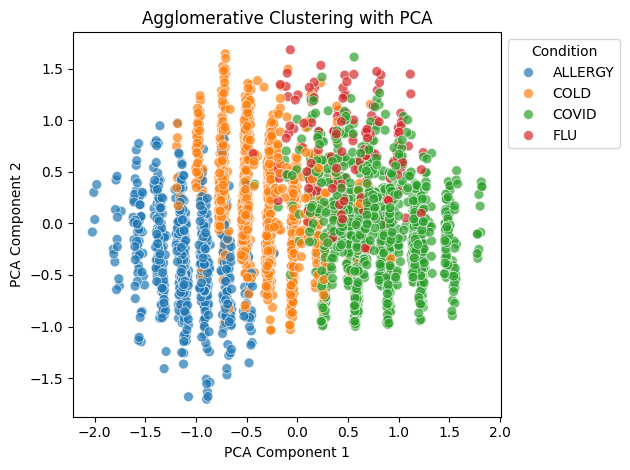

In [ ]:
# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Map numeric cluster labels to string labels
unique_classes = np.unique(y_resampled)
cluster_to_class_mapping = {cluster: unique_classes[true_class] for cluster, true_class in mapping.items()}
string_labels = [cluster_to_class_mapping[label] for label in agglomerative_labels]

# Visualize the clustering results with string labels
plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=string_labels, palette="tab10", s=50, alpha=0.7)
plt.title("Agglomerative Clustering with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Condition", loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## DBSCAN

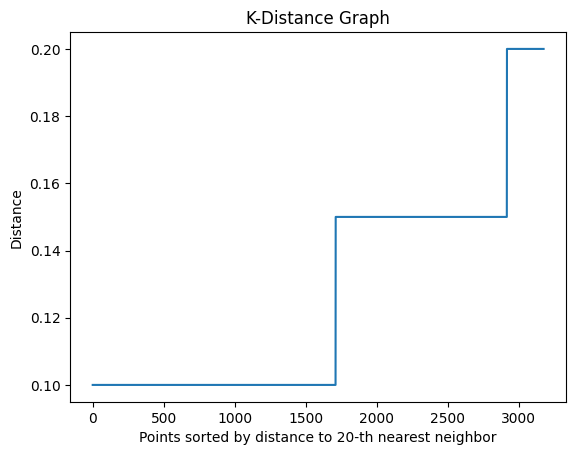

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Set min_samples for DBSCAN
min_samples = 21 # use dimensionality+1 as starting point for min_samples

# Compute the k-nearest neighbors distances
nbrs = NearestNeighbors(n_neighbors=min_samples, metric='hamming').fit(X_resampled)
distances, indices = nbrs.kneighbors(X_resampled)

# Sort the distances for the k-th neighbor
k_distances = np.sort(distances[:, min_samples - 1])

# Plot the K-distance graph
plt.figure()
plt.plot(k_distances)
plt.title("K-Distance Graph")
plt.xlabel("Points sorted by distance to {}-th nearest neighbor".format(min_samples - 1))
plt.ylabel("Distance")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances

dist_matrix = pairwise_distances(X_resampled.values, metric='hamming')
dbscan = DBSCAN(eps=0.15, min_samples=21, metric='precomputed')
dbscan_labels = dbscan.fit_predict(dist_matrix)

In [ ]:
print(np.unique(dbscan_labels))

[0]


In [ ]:
# Evaluate DBSCAN clustering
print("Silhouette Score:", silhouette_score(X_resampled, dbscan_labels))
print("Adjusted Rand Index:", adjusted_rand_score(y_resampled, dbscan_labels))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

## GaussianMixture

In [ ]:
# Fit GMM with the 4 clusters
gmm = GaussianMixture(n_components=4, random_state=42) # clustering as 4 groups
gmm_labels = gmm.fit_predict(X_resampled)

# Evaluate clustering performance
ari = adjusted_rand_score(y_resampled, gmm_labels)
silhouette = silhouette_score(X_resampled, gmm_labels)

print(f"Silhouette Score: {silhouette}")
print(f"Adjusted Rand Index (ARI): {ari}")


Silhouette Score: 0.025610175501496933
Adjusted Rand Index (ARI): 0.4850637213332898


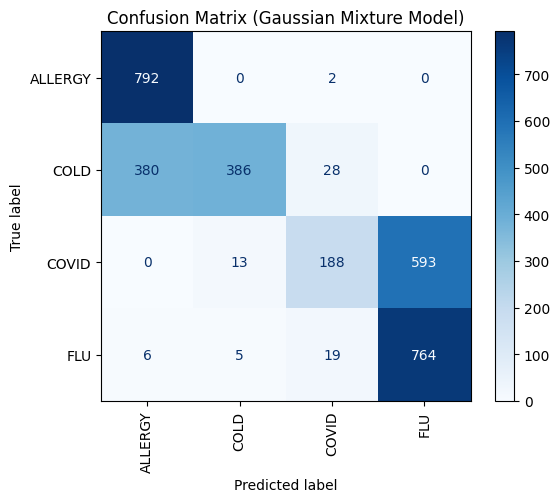

In [ ]:
# Confusion Matrix and Label Mapping
conf_matrix = confusion_matrix(y_undersampling_numeric, gmm_labels)

# Use Hungarian Algorithm for optimal mapping of clusters to true labels
row_ind, col_ind = linear_sum_assignment(-conf_matrix)  # Maximize diagonal
mapping = dict(zip(col_ind, row_ind))

# Map numeric cluster labels to string labels from y_resampled
unique_classes = np.unique(y_resampled)
cluster_to_class_mapping = {cluster: unique_classes[true_class] for cluster, true_class in mapping.items()}
mapped_labels = [cluster_to_class_mapping[label] for label in gmm_labels]

# Plot Confusion Matrix
remapped_conf_matrix = confusion_matrix(y_resampled, mapped_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=remapped_conf_matrix, display_labels=unique_classes)
disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix (Gaussian Mixture Model)")
plt.show()


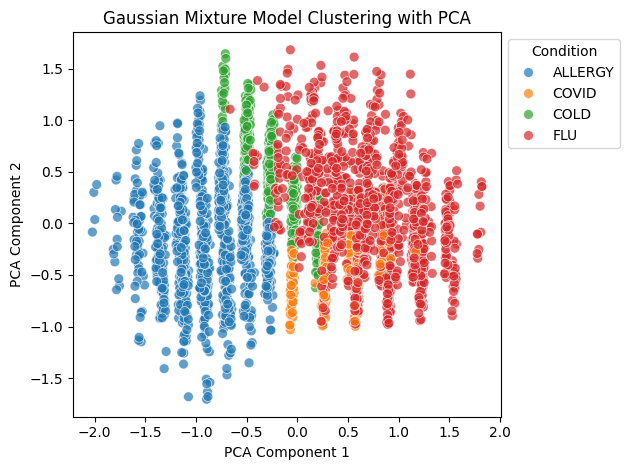

In [ ]:
# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=mapped_labels, palette="tab10", s=50, alpha=0.7)
plt.title("Gaussian Mixture Model Clustering with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Condition", loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


### PCA for true labels

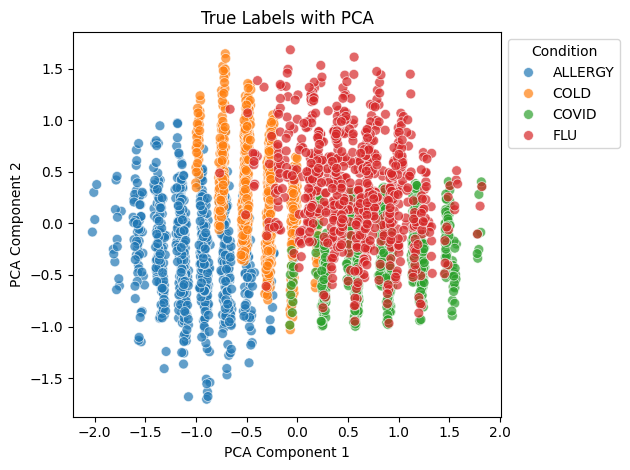

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_resampled, palette="tab10", s=50, alpha=0.7)
plt.title("True Labels with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Condition", loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()